In [1]:
import tensorflow as tf
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

In [3]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import time
import os
from os import listdir

In [4]:
def crop_brain_contour(image, plot=False):
    
    #import imutils
    #import cv2
    #from matplotlib import pyplot as plt
    
    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    # Find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        
        plt.show()
    
    return new_image

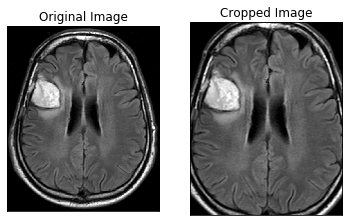

In [5]:
ex_img = cv2.imread('/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/yes/Y7.jpg')
ex_new_img = crop_brain_contour(ex_img, True)

In [14]:
def load_data(path_list, image_size):
    """
    Read images, resize and normalize them. 
    Arguments:
        dir_list: list of strings representing file directories.
    Returns:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    """

    # load all images in a directory
    X = []
    y = []
    image_width, image_height = image_size
    
    for path in path_list:
        os.chdir(path)
        current_directory=os.getcwd()
        for filename in os.listdir(path):
            file_path=os.path.abspath(filename)
            print(file_path)
            # load the image
            image = cv2.imread(file_path)
            # crop the brain and ignore the unnecessary rest part of the image
            image = crop_brain_contour(image, plot=False)
            # resize image
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
            # normalize values
            image = image / 255.
            # convert image to numpy array and append it to X
            X.append(image)
            # append a value of 1 to the target array if the image
            # is in the folder named 'yes', otherwise append 0.
            if current_directory[-3:] == 'yes':
                y.append([1])
            else:
                y.append([0])
                
    X = np.array(X)
    y = np.array(y)
    X, y = shuffle(X, y)
    
    
    return X, y

    

In [21]:
augmented_path = '/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/'

yes_path = '/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes'
no_path = '/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no'
#path_list=[yes_path,no_path]
IMG_WIDTH, IMG_HEIGHT = (240, 240)


X, y = load_data([yes_path, no_path], (IMG_WIDTH, IMG_HEIGHT))

/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y91_0_2319.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y159_0_7926.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y169_0_6289.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y249_0_7795.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y102_0_4385.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y160_0_4811.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y194_0_7450.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y1_0_2900.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y163_0_8797.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y65_0_7735.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y115_0_2

/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y3_0_4952.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y160_0_4860.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y24_0_1174.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y31_0_8476.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y120_0_7662.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y40_0_5895.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y251_0_5241.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y185_0_8722.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y250_0_3617.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y78_0_3102.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y252_0_884

/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y162_0_6948.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y89_0_1381.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y89_0_5829.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y47_0_3219.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y10_0_5995.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y245_0_7378.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y78_0_791.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y89_0_3209.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y106_0_2432.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y185_0_5815.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y69_0_9230.

/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y29_0_2380.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y158_0_6807.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y188_0_2219.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y186_0_5799.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y166_0_8190.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y38_0_4931.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y116_0_6520.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y113_0_50.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y103_0_4870.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y252_0_4412.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y259_0_4

/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y244_0_4437.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y45_0_2256.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y187_0_8303.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y61_0_1443.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y161_0_4244.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y41_0_5534.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y73_0_7097.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y154_0_5037.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y146_0_3091.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y169_0_5538.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y59_0_98

/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y182_0_5624.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y31_0_833.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y181_0_485.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y33_0_6063.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y22_0_2025.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y184_0_8832.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y92_0_4631.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y67_0_7719.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y158_0_5742.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y41_0_9371.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y258_0_9279.

/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y12_0_9172.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y168_0_8029.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y97_0_2076.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y256_0_9393.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y164_0_9493.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y39_0_8470.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y156_0_7530.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y92_0_1860.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y92_0_3151.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y38_0_3934.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y193_0_449

/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y4_0_6426.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y65_0_8529.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y3_0_8717.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y86_0_2251.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y30_0_3399.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y70_0_4433.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y183_0_6050.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y252_0_1480.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y98_0_2422.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y58_0_4535.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y187_0_6012.jp

/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y95_0_6763.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y112_0_1059.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y117_0_9217.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y66_0_6632.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y15_0_537.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y154_0_1649.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y62_0_2311.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y108_0_8620.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y167_0_6072.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y249_0_4141.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y160_0_75

/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/yes/aug_Y69_0_6524.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_41 no_0_296.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_29 no_0_8820.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_no 2_0_5830.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_2 no._0_7376.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_no 2_0_1184.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_40 no_0_8704.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_no_0_8480.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_46 no_0_2373.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_10 no_0_673.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_20 no_0_8924.

/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_31 no_0_9740.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_N19_0_2313.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_no 91._0_7189.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_35 no_0_7645.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_no 95_0_2765.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_22 no_0_2977.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_42 no_0_3053.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_no 3_0_959.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_no 89_0_3487.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_6 no_0_9704.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_7 no_0_99

/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_No14_0_6064.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_33 no_0_8147.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_32 no_0_9622.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_no 5._0_2726.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_13 no_0_4072.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_N19_0_2312.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_N21_0_9387.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_no 96_0_9256.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_26 no_0_7466.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_no 89_0_2872.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_N20_0_7762

/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_25 no_0_8766.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_35 no_0_618.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_no 2_0_5675.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_no 10_0_714.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_no 98_0_6218.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_8 no_0_146.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_N5_0_2262.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_43 no_0_7094.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_No16_0_5791.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_12 no_0_8269.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_N1_0_5613.jpg


/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_31 no_0_9437.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_No16_0_2965.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_no 97_0_4268.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_14 no_0_9478.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_No18_0_7190.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_N1_0_4529.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_27 no_0_9639.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_21 no_0_5278.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_N19_0_154.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_N6_0_6281.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_1 no._0_1917.jpg

/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_N6_0_3601.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_29 no_0_4448.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_11 no_0_9531.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_no 6_0_8053.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_18 no_0_3118.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_26 no_0_379.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_no 2_0_51.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_23 no_0_2252.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_no 95_0_1654.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_no 100_0_6285.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_no 98_0_7125

/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_N6_0_2853.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_no 100_0_1945.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_50 no_0_3508.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_15 no_0_4803.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_43 no_0_2656.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_no 91._0_4773.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_19 no_0_5137.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_48 no._0_3333.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_12 no_0_7676.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_No19_0_7239.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_3 no_0

/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_N5_0_2601.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_32 no_0_9271.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_no 6_0_9223.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_25 no_0_3207.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_no 99_0_6823.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_19 no_0_798.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_no 95_0_9674.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_43 no_0_9379.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_24 no_0_2171.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_24 no_0_3936.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_9 no_0_612

/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_4 no_0_9150.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_N21_0_5425.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_no 3_0_34.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_8 no_0_2612.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_37 no_0_7242.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_no 6_0_4362.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_20 no_0_657.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_N19_0_1268.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_17 no_0_3463.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_No19_0_990.jpg
/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/augmented data/no/aug_49 no_0_8224.jpg
/

In [29]:
y

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

In [30]:
def plot_sample_images(X, y, n=50):
    """
    Plots n sample images for both values of y (labels).
    Arguments:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    """
    
    for label in [0,1]:
        # grab the first n images with the corresponding y values equal to label
        images = X[np.argwhere(y == label)]
        n_images = images[:n]
        
        columns_n = 10
        rows_n = int(n/ columns_n)

        plt.figure(figsize=(20, 10))
        
        i = 1 # current plot        
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image[0])
            
            # remove ticks
            plt.tick_params(axis='both', which='both', 
                            top=False, bottom=False, left=False, right=False,
                           labelbottom=False, labeltop=False, labelleft=False, labelright=False)
            
            i += 1
        
        label_to_str = lambda label: "Yes" if label == 1 else "No"
        plt.suptitle("Brain Tumor: " + label_to_str(label))
        plt.show()

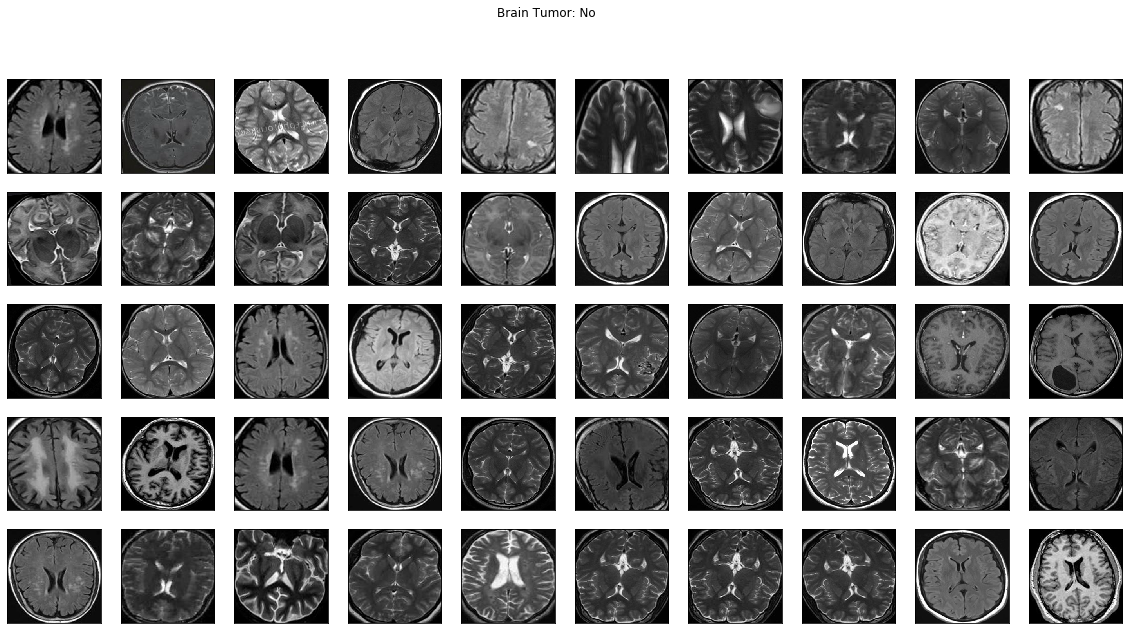

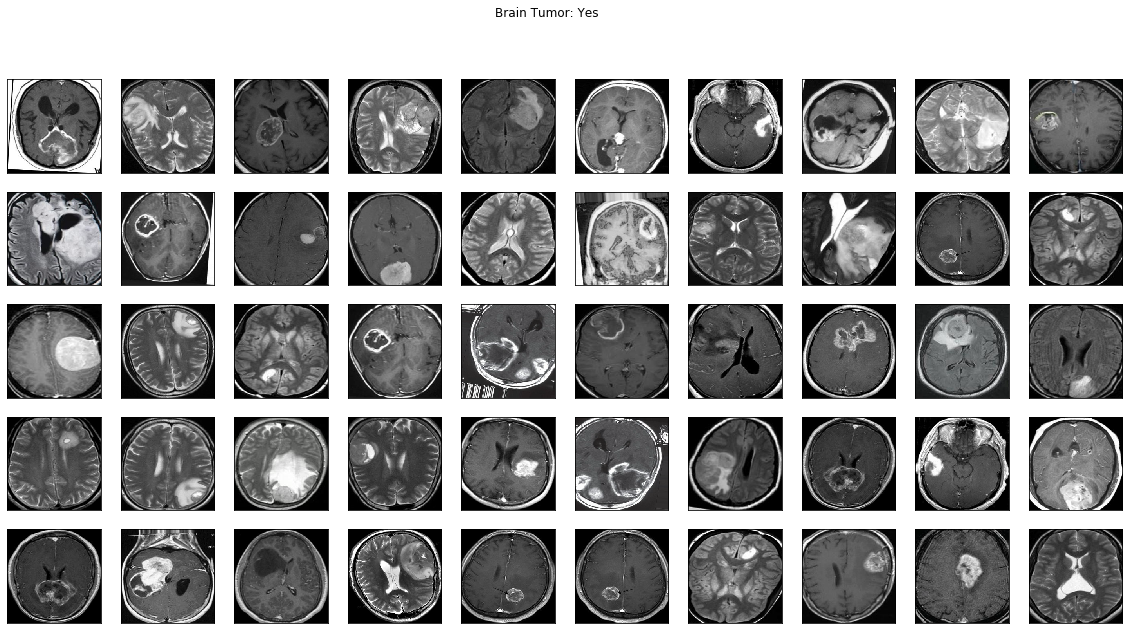

In [31]:
plot_sample_images(X, y)

In [32]:
def split_data(X, y, test_size=0.2):    
    X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=test_size)
    X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [77]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y, test_size=0.3)

In [34]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of development examples = " + str(X_val.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_val (dev) shape: " + str(X_val.shape))
print ("Y_val (dev) shape: " + str(y_val.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 1445
number of development examples = 310
number of test examples = 310
X_train shape: (1445, 240, 240, 3)
Y_train shape: (1445, 1)
X_val (dev) shape: (310, 240, 240, 3)
Y_val (dev) shape: (310, 1)
X_test shape: (310, 240, 240, 3)
Y_test shape: (310, 1)


In [35]:
# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{h}:{m}:{round(s,1)}"

In [36]:
def compute_f1_score(y_true, prob):
    # convert the vector of probabilities to a target vector
    y_pred = np.where(prob > 0.5, 1, 0)
    
    score = f1_score(y_true, y_pred)
    
    return score

In [37]:
def build_model(input_shape):
    """
    Arugments:
        input_shape: A tuple representing the shape of the input of the model. shape=(image_width, image_height, #_channels)
    Returns:
        model: A Model object.
    """
    # Define the input placeholder as a tensor with shape input_shape. 
    X_input = Input(input_shape) # shape=(?, 240, 240, 3)
    
    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((2, 2))(X_input) # shape=(?, 244, 244, 3)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X) # shape=(?, 238, 238, 32)
    
    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool0')(X) # shape=(?, 59, 59, 32) 
    
    # MAXPOOL
    X = MaxPooling2D((4, 4), name='max_pool1')(X) # shape=(?, 14, 14, 32)
    
    # FLATTEN X 
    
    X = Flatten()(X) # shape=(?, 6272)
    # FULLYCONNECTED
    X = Dense(1, activation='sigmoid', name='fc')(X) # shape=(?, 1)
    
    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='BrainDetectionModel')
    
    return model

In [38]:
IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)
model = build_model(IMG_SHAPE)


In [39]:
model.summary()


Model: "BrainDetectionModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 240, 240, 3)]     0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 244, 244, 3)       0         
_________________________________________________________________
conv0 (Conv2D)               (None, 238, 238, 32)      4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 238, 238, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 238, 238, 32)      0         
_________________________________________________________________
max_pool0 (MaxPooling2D)     (None, 59, 59, 32)        0         
_________________________________________________________________
max_pool1 (MaxPooling2D)     (None, 14, 14, 32)

In [40]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [41]:
# tensorboard
log_file_name = 'brain_tumor_detection_cnn_{int(time.time())}'
tensorboard = TensorBoard(log_dir='logs/{log_file_name}')


In [42]:
# checkpoint
# unique file name that will include the epoch and the validation (development) accuracy
filepath="cnn-parameters-improvement-{epoch:02d}-{val_accuracy:.2f}"
# save the model with the best validation (development) accuracy till now
checkpoint = ModelCheckpoint("/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/models1/{}.model".format(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max'))

In [43]:
start_time = time.time()

model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val), callbacks=[tensorboard, checkpoint])

end_time = time.time()
execution_time = (end_time - start_time)
print(f"Elapsed time: {hms_string(execution_time)}")

Epoch 1/10
46/46 [==============================] - ETA: 0s - loss: 0.8616 - accuracy: 0.6298WARNING:tensorflow:From /home/kackerzzz/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /home/kackerzzz/Desktop/Brain-Tumor-Detection-master/models1/cnn-parameters-improvement-01-0.60.model/assets
46/46 [==============================] - 62s 1s/step - loss: 0.8616 - accuracy: 0.6298 - val_loss: 0.6419 - val_accuracy: 0.6000
Epoch 2/10
46/46 [==============================] - 66s 1s/step - loss: 0.4958 - accuracy: 0.7606 - val_loss: 0.6285 - val_accuracy: 0.6710
Epoch 3/10
46/46 [==============================] - 61s 1s/step - loss: 0.4308 - accuracy: 0.8152 - val_loss: 0.5551 - val

In [46]:
start_time = time.time()

model.fit(x=X_train, y=y_train, batch_size=32, epochs=3, validation_data=(X_val, y_val), callbacks=[tensorboard, checkpoint])

end_time = time.time()
execution_time = (end_time - start_time)
print("Elapsed time:" + str(hms_string(execution_time)))

Epoch 1/3
46/46 [==============================] - 72s 2s/step - loss: 0.2447 - accuracy: 0.8927 - val_loss: 0.3740 - val_accuracy: 0.8452
Epoch 2/3
46/46 [==============================] - 67s 1s/step - loss: 0.1931 - accuracy: 0.9336 - val_loss: 0.7474 - val_accuracy: 0.7226
Epoch 3/3
46/46 [==============================] - 61s 1s/step - loss: 0.2384 - accuracy: 0.8976 - val_loss: 0.3366 - val_accuracy: 0.8645
Elapsed time:{h}:{m}:{round(s,1)}


In [47]:
history = model.history.history
for key in history.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy


In [48]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.xticks([0,5,10,15,20,25])
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

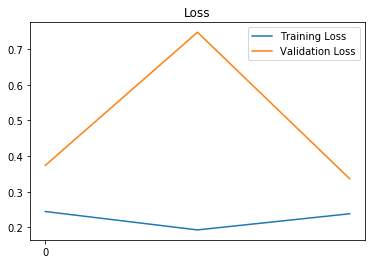

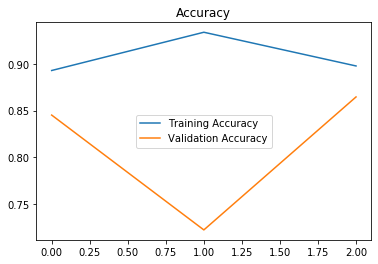

In [49]:
plot_metrics(history)


In [50]:
best_model = load_model(filepath='/home/kackerzzz/Desktop/Brain-Tumor-Detection-master/models1/cnn-parameters-improvement-03-0.86.model')


In [62]:
best_model.metrics_names

['loss', 'accuracy']

In [68]:
print(y_test)

[[0.5048945]]


In [70]:
loss, acc = best_model.evaluate(x=X_test, y=y_test)


10/10 [==============================] - 2s 220ms/step - loss: 0.1809 - accuracy: 0.9484


In [71]:
print ("Test Loss = %s" %loss)
print ("Test Accuracy = %s" %acc)

Test Loss = 0.18091540038585663
Test Accuracy = 0.948387086391449


In [78]:
y_test_prob = best_model.predict(X_test)

In [79]:
f1score = compute_f1_score(y_test, y_test_prob)
print(f"F1 score: {f1score}")

F1 score: 0.893371757925072


In [80]:
y_val_prob = best_model.predict(X_val)

In [81]:
f1score_val = compute_f1_score(y_val, y_val_prob)
print(f"F1 score: {f1score_val}")

F1 score: 0.9309309309309309


In [82]:
def data_percentage(y):
    
    m=len(y)
    n_positive = np.sum(y)
    n_negative = m - n_positive
    
    pos_prec = (n_positive* 100.0)/ m
    neg_prec = (n_negative* 100.0)/ m
    
    print(f"Number of examples: {m}")
    print(f"Percentage of positive examples: {pos_prec}%, number of pos examples: {n_positive}") 
    print(f"Percentage of negative examples: {neg_prec}%, number of neg examples: {n_negative}")

In [83]:
# the whole data
data_percentage(y)

Number of examples: 2065
Percentage of positive examples: 52.54237288135593%, number of pos examples: 1085
Percentage of negative examples: 47.45762711864407%, number of neg examples: 980


In [84]:

print("Training Data:")
data_percentage(y_train)
print("Validation Data:")
data_percentage(y_val)
print("Testing Data:")
data_percentage(y_test)

Training Data:
Number of examples: 1445
Percentage of positive examples: 52.8719723183391%, number of pos examples: 764
Percentage of negative examples: 47.1280276816609%, number of neg examples: 681
Validation Data:
Number of examples: 310
Percentage of positive examples: 51.29032258064516%, number of pos examples: 159
Percentage of negative examples: 48.70967741935484%, number of neg examples: 151
Testing Data:
Number of examples: 310
Percentage of positive examples: 52.25806451612903%, number of pos examples: 162
Percentage of negative examples: 47.74193548387097%, number of neg examples: 148
